<a href="https://colab.research.google.com/github/bintangprajudha/Machine-learning-project/blob/main/Breast_cancer_predicted_with_svm/Breast_cancer_predicted_with_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
wasiqaliyasir_breast_cancer_dataset_path = kagglehub.dataset_download('wasiqaliyasir/breast-cancer-dataset')

print('Data source import complete.')


Data source import complete.


In [144]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import QuantileTransformer, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, log_loss, recall_score, classification_report,
                           confusion_matrix, make_scorer)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/Breast_cancer_dataset.csv


In [145]:
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/Breast_cancer_dataset.csv')
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [146]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [147]:
print(df.columns)
print(df.shape)
print(df['diagnosis'].unique())

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
(569, 33)
['M' 'B']


In [148]:
def preprocess_data(df):
    """Preprocess the breast cancer dataset"""
    # Remove unnecessary columns
    X = df.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1, errors='ignore')
    y = df['diagnosis']

    # Split data
    X_train_valid, X_test, y_train_valid, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_valid, y_train_valid, test_size=0.25, random_state=42, stratify=y_train_valid
    )

    # Scale features
    scaler = QuantileTransformer(random_state=42)
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)

    # Encode labels
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    y_valid_encoded = le.transform(y_valid)
    y_test_encoded = le.transform(y_test)

    return (X_train_scaled, X_valid_scaled, X_test_scaled,
            y_train_encoded, y_valid_encoded, y_test_encoded, scaler, le)

In [149]:
def perform_grid_search(X_train_scaled, y_train_encoded):
    """Perform comprehensive grid search for SVM"""
    svm_model = SVC(probability=True, random_state=42, class_weight='balanced')
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Parameter grid
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100, 1000],
        'gamma': ['scale', 'auto', 0.01, 0.001, 0.0001],
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'degree': [2, 3, 4]  # only affects poly kernel
    }

    # Scoring metrics
    scoring = {
        'recall': make_scorer(recall_score, average='macro'),
        'accuracy': 'accuracy',
        'log_loss': make_scorer(log_loss, greater_is_better=False, response_method='predict_proba')
    }

    # Grid Search
    grid_search = GridSearchCV(
        estimator=svm_model,
        param_grid=param_grid,
        scoring=scoring,
        cv=skf,
        refit='recall',
        n_jobs=-1,
        verbose=1
    )

    print("Starting Grid Search...")
    grid_search.fit(X_train_scaled, y_train_encoded)

    return grid_search

In [150]:
def evaluate_model(model, X_train, X_valid, X_test, y_train, y_valid, y_test, le):
    """Comprehensive model evaluation"""
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Cross-validation on training set (FIXED)
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
    cv_logloss = cross_val_score(model, X_train, y_train, cv=skf, scoring='neg_log_loss')

    print("\nCross-validation Results (Training Set):")
    print(f"  Accuracy: {cv_accuracy.mean():.4f} (+/- {cv_accuracy.std():.4f})")
    print(f"  Log Loss: {-cv_logloss.mean():.4f} (+/- {cv_logloss.std():.4f})")

    # Validation set evaluation
    y_valid_pred = model.predict(X_valid)
    y_valid_pred_proba = model.predict_proba(X_valid)

    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    valid_logloss = log_loss(y_valid, y_valid_pred_proba)

    print(f"\nValidation Set Results:")
    print(f"  Accuracy: {valid_accuracy:.4f}")
    print(f"  Log Loss: {valid_logloss:.4f}")

    # Test set evaluation
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_logloss = log_loss(y_test, y_test_pred_proba)

    print(f"\nTest Set Results:")
    print(f"  Accuracy: {test_accuracy:.4f}")
    print(f"  Log Loss: {test_logloss:.4f}")

    # Classification report
    print(f"\nClassification Report (Test Set):")
    target_names = le.classes_
    print(classification_report(y_test, y_test_pred, target_names=target_names))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.title('Confusion Matrix - Test Set')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    print('\n')

    return cv_accuracy, cv_logloss

In [151]:
def plot_cv_results(cv_accuracy, cv_logloss):
    """Plot cross-validation results"""
    folds = range(1, len(cv_accuracy) + 1)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Accuracy plot
    axes[0].plot(folds, cv_accuracy, marker='o', linestyle='-', color='skyblue')
    axes[0].axhline(y=cv_accuracy.mean(), color='red', linestyle='--', alpha=0.7,
                    label=f'Mean: {cv_accuracy.mean():.4f}')
    axes[0].set_xlabel('Fold')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('SVM Model Accuracy per CV Fold')
    axes[0].set_xticks(folds)
    axes[0].set_ylim(0, 1)
    axes[0].grid(axis='y', linestyle='--', alpha=0.3)
    axes[0].legend()

    # Log loss plot
    axes[1].plot(folds, -cv_logloss, marker='o', linestyle='-', color='lightcoral')
    axes[1].axhline(y=-cv_logloss.mean(), color='red', linestyle='--', alpha=0.7,
                    label=f'Mean: {-cv_logloss.mean():.4f}')
    axes[1].set_xlabel('Fold')
    axes[1].set_ylabel('Log Loss')
    axes[1].set_title('SVM Model Log Loss per CV Fold')
    axes[1].set_xticks(folds)
    axes[1].grid(axis='y', linestyle='--', alpha=0.3)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

In [152]:
X_train_scaled, X_valid_scaled, X_test_scaled, y_train_encoded, y_valid_encoded, y_test_encoded, scaler, le = preprocess_data(df)
print("Data shapes:")
print(f"  Training set: {X_train_scaled.shape}")
print(f"  Validation set: {X_valid_scaled.shape}")
print(f"  Test set: {X_test_scaled.shape}")

Data shapes:
  Training set: (341, 30)
  Validation set: (114, 30)
  Test set: (114, 30)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (341). n_quantiles is set to n_samples.
  warnings.warn(


In [153]:
grid_search = perform_grid_search(X_train_scaled, y_train_encoded)
best_model = grid_search.best_estimator_
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.4f}")

Starting Grid Search...
Fitting 10 folds for each of 360 candidates, totalling 3600 fits

Best Parameters: {'C': 1000, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}
Best CV Score: 0.9725



Cross-validation Results (Training Set):
  Accuracy: 0.9736 (+/- 0.0158)
  Log Loss: 0.0939 (+/- 0.0433)

Validation Set Results:
  Accuracy: 0.9737
  Log Loss: 0.0948

Test Set Results:
  Accuracy: 0.9737
  Log Loss: 0.0667

Classification Report (Test Set):
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        72
           M       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



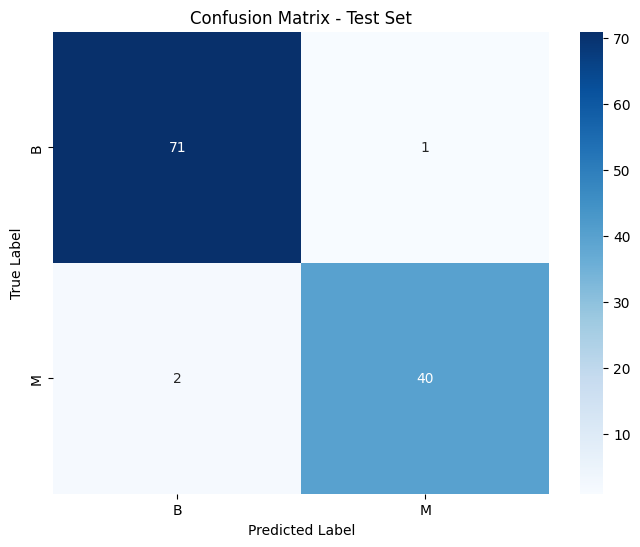

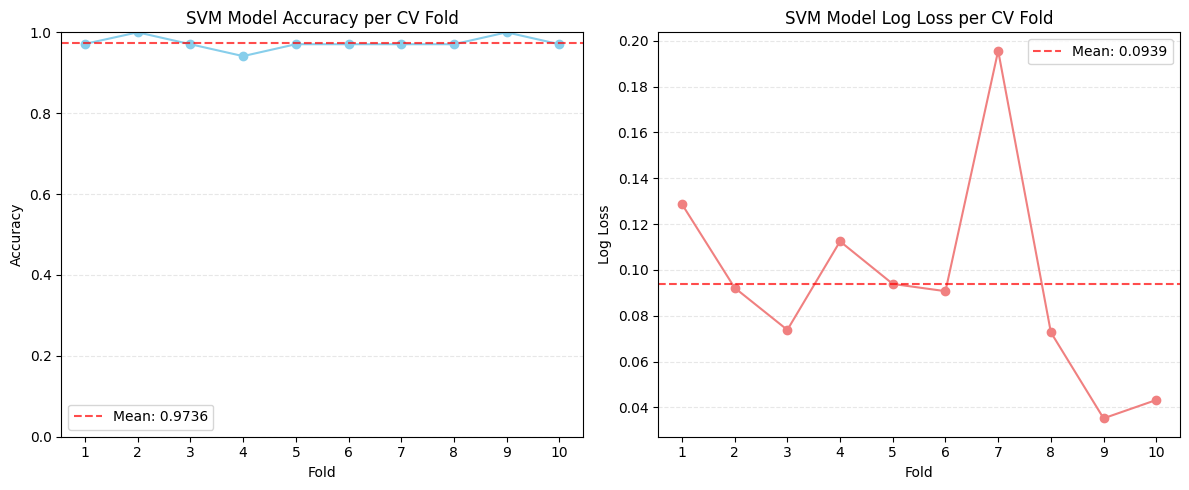

In [154]:
cv_accuracy, cv_logloss = evaluate_model(
    best_model, X_train_scaled, X_valid_scaled, X_test_scaled,
    y_train_encoded, y_valid_encoded, y_test_encoded, le
)
plot_cv_results(cv_accuracy, cv_logloss)